In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\k\Downloads\Untitled form (Responses).xlsx")
df.head()

,Timestamp,Age,Gender,Occupation,Annual Income,Do you own a car?,"If yes, which car/s do you own?","If no, which car do you plan to buy?",Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency,Influence
0,2020-09-09 13:17:26.519,31 to 50,Male,Private Employee,Below 5 Lakhs,Yes,Hyundai,NaN,4,4,4,2,5,4,5,4,"Internet (Reviews, blogs etc.)"
1,2020-09-09 13:22:04.976,18 to 30,Male,Student,Below 5 Lakhs,No,NaN,Kia,4,4,3,4,4,4,4,4,"Family, Friends, Internet (Reviews, blogs etc.)"
2,2020-09-09 13:22:42.075,18 to 30,Female,Student,Below 5 Lakhs,No,NaN,Hyundai,5,4,4,4,5,5,4,4,"Family, Friends, Ad Campaigns, Internet (Revie..."
3,2020-09-09 13:23:50.298,31 to 50,Female,Public Employee,5 to 10 Lakhs,Yes,Maruti,NaN,3,4,5,3,3,4,4,5,"Family, Friends, Internet (Reviews, blogs etc...."
4,2020-09-09 13:24:01.478,18 to 30,Male,Private Employee,5 to 10 Lakhs,Yes,Maruti,Maruti,4,5,5,5,5,5,4,4,"Family, Internet (Reviews, blogs etc.), Discou..."


In [3]:
df.drop(["Timestamp", "If yes, which car/s do you own?", "If no, which car do you plan to buy?", "Influence"], axis = 1, inplace = True)

In [4]:
df.head()

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,31 to 50,Male,Private Employee,Below 5 Lakhs,Yes,4,4,4,2,5,4,5,4
1,18 to 30,Male,Student,Below 5 Lakhs,No,4,4,3,4,4,4,4,4
2,18 to 30,Female,Student,Below 5 Lakhs,No,5,4,4,4,5,5,4,4
3,31 to 50,Female,Public Employee,5 to 10 Lakhs,Yes,3,4,5,3,3,4,4,5
4,18 to 30,Male,Private Employee,5 to 10 Lakhs,Yes,4,5,5,5,5,5,4,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           40 non-null     object
 1   Gender                        40 non-null     object
 2   Occupation                    40 non-null     object
 3   Annual Income                 40 non-null     object
 4   Do you own a car?             40 non-null     object
 5   Number of family members      40 non-null     object
 6   Price                         40 non-null     int64 
 7   Mileage                       40 non-null     int64 
 8   Brand Name                    40 non-null     int64 
 9   Safety                        40 non-null     int64 
 10  Comfort                       40 non-null     int64 
 11  Interior and Exterior Design  40 non-null     int64 
 12  Fuel Efficiency               40 non-null     int64 
dtypes: int64(7), object(6)

In [6]:
encoder = LabelEncoder()
Age_ec = encoder.fit_transform(df.iloc[:,0])
Gender_ec = encoder.fit_transform(df.iloc[:,1])
Occupation_ec = encoder.fit_transform(df.iloc[:,2])
Income_ec = encoder.fit_transform(df.iloc[:,3])
Own_ec = encoder.fit_transform(df.iloc[:,4])

In [7]:
df["Age"] = Age_ec
df["Gender"] = Gender_ec
df["Occupation"] = Occupation_ec
df["Annual Income"] = Income_ec
df["Do you own a car?"] = Own_ec

In [8]:
df.head()

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,1,1,1,3,1,4,4,4,2,5,4,5,4
1,0,1,4,3,0,4,4,3,4,4,4,4,4
2,0,0,4,3,0,5,4,4,4,5,5,4,4
3,1,0,2,1,1,3,4,5,3,3,4,4,5
4,0,1,1,1,1,4,5,5,5,5,5,4,4


In [9]:
df["Number of family members"] = df["Number of family members"].replace(to_replace ="More than 5", 
                 value ="6") 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           40 non-null     int32 
 1   Gender                        40 non-null     int32 
 2   Occupation                    40 non-null     int32 
 3   Annual Income                 40 non-null     int32 
 4   Do you own a car?             40 non-null     int32 
 5   Number of family members      40 non-null     object
 6   Price                         40 non-null     int64 
 7   Mileage                       40 non-null     int64 
 8   Brand Name                    40 non-null     int64 
 9   Safety                        40 non-null     int64 
 10  Comfort                       40 non-null     int64 
 11  Interior and Exterior Design  40 non-null     int64 
 12  Fuel Efficiency               40 non-null     int64 
dtypes: int32(5), int64(7),

In [11]:
df["Number of family members"].value_counts()

4    20
5    11
3     5
6     3
2     1
Name: Number of family members, dtype: int64

In [12]:
df["Number of family members"] = df["Number of family members"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           40 non-null     int32
 1   Gender                        40 non-null     int32
 2   Occupation                    40 non-null     int32
 3   Annual Income                 40 non-null     int32
 4   Do you own a car?             40 non-null     int32
 5   Number of family members      40 non-null     int32
 6   Price                         40 non-null     int64
 7   Mileage                       40 non-null     int64
 8   Brand Name                    40 non-null     int64
 9   Safety                        40 non-null     int64
 10  Comfort                       40 non-null     int64
 11  Interior and Exterior Design  40 non-null     int64
 12  Fuel Efficiency               40 non-null     int64
dtypes: int32(6), int64(7)
memory usage: 3

In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [15]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Annual Income', 'Do you own a car?',
       'Number of family members', 'Price', 'Mileage', 'Brand Name', 'Safety',
       'Comfort', 'Interior and Exterior Design', 'Fuel Efficiency'],
      dtype='object')

In [16]:
df1 = pd.DataFrame(data = scaled, columns = ['Age', 'Gender', 'Occupation', 'Annual Income', 'Do you own a car?',
       'Number of family members', 'Price', 'Mileage', 'Brand Name', 'Safety',
       'Comfort', 'Interior and Exterior Design', 'Fuel Efficiency'])

In [17]:
df1.head()

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,2.645751,0.436436,-1.118162,0.754890,1.0,-0.291111,-0.465250,-0.371021,-2.169305,0.534749,-0.933008,1.118518,-0.401610
1,-0.377964,0.436436,0.914860,0.754890,-1.0,-0.291111,-0.465250,-1.720187,0.000000,-1.110632,-0.933008,-0.197386,-0.401610
2,-0.377964,-1.745743,0.914860,0.754890,-1.0,0.873334,-0.465250,-0.371021,0.000000,0.534749,0.763370,-0.197386,-0.401610
3,2.645751,-1.745743,-0.440488,-1.075146,1.0,-1.455556,-0.465250,0.978146,-1.084652,-2.756012,-0.933008,-0.197386,1.204829
4,-0.377964,0.436436,-1.118162,-1.075146,1.0,-0.291111,1.226569,0.978146,1.084652,0.534749,0.763370,-0.197386,-0.401610


In [18]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)

In [19]:
df2.shape

(40, 2)

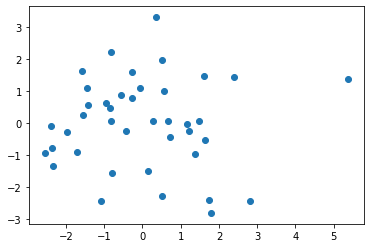

In [20]:
plt.scatter(df2[:, 0], df2[:, 1])

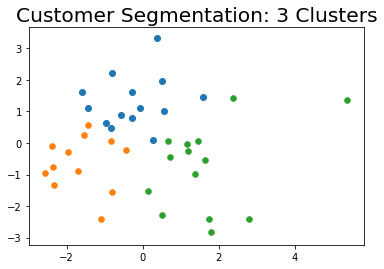

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Customer Segmentation: 3 Clusters")
    plt.style.use('fivethirtyeight')

In [22]:
print(model.labels_)

[2 0 0 2 2 1 0 0 1 1 2 0 1 1 1 2 2 2 1 0 0 2 1 2 1 0 1 0 1 1 0 0 0 2 2 2 2
 0 0 2]


In [23]:
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [24]:
dictlist[0]

[0,
 array([ 1,  2,  6,  7, 11, 19, 20, 25, 27, 30, 31, 32, 37, 38],
       dtype=int64)]

In [25]:
df3 = df.values

In [26]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1], columns = ['Age', 'Gender', 'Occupation', 'Annual Income', 'Do you own a car?',
       'Number of family members', 'Price', 'Mileage', 'Brand Name', 'Safety',
       'Comfort', 'Interior and Exterior Design', 'Fuel Efficiency'])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1], columns = ['Age', 'Gender', 'Occupation', 'Annual Income', 'Do you own a car?',
       'Number of family members', 'Price', 'Mileage', 'Brand Name', 'Safety',
       'Comfort', 'Interior and Exterior Design', 'Fuel Efficiency'])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ['Age', 'Gender', 'Occupation', 'Annual Income', 'Do you own a car?',
       'Number of family members', 'Price', 'Mileage', 'Brand Name', 'Safety',
       'Comfort', 'Interior and Exterior Design', 'Fuel Efficiency'])

In [27]:
cluster_1

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,0,1,4,3,0,4,4,3,4,4,4,4,4
1,0,0,4,3,0,5,4,4,4,5,5,4,4
2,0,1,4,3,1,5,4,4,3,5,5,4,5
3,0,1,4,3,0,5,4,3,4,5,4,5,4
4,0,0,4,3,1,4,5,4,4,5,5,4,4
5,0,1,4,3,1,6,4,3,4,4,4,5,3
6,0,1,1,3,0,5,5,4,2,4,5,3,4
7,0,1,4,3,0,4,4,5,3,5,4,4,4
8,0,1,4,3,0,6,4,4,4,5,5,4,4
9,0,1,1,3,0,4,4,3,4,4,5,5,4


In [28]:
## Final Report of Cluster 1
print("*" * 75)
print("The Average age of Customers in cluster 1 is:")
print(cluster_1.Age.mode())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 1 are:")
print(cluster_1["Gender"].value_counts())
print("*" * 75)
print("The value counts of customers occupation in cluster 1 are:")
print(cluster_1["Occupation"].value_counts())
print("*" * 75)
print("The Average annual income (in rupees) of Customers in category 1 is:")
print(cluster_1["Annual Income"].value_counts())
print("*" * 75)
print("The frequent family size of customers in category 1 is:")
print(cluster_1["Number of family members"].mode())
print("*" * 75)
print("The Price sentiment of customers in category 1 is:")
print(cluster_1["Price"].mean())
print("*" * 75)
print("The Mileage sentiment of customers in category 1 is:")
print(cluster_1["Mileage"].mean())
print("*" * 75)
print("The Brand importance of customers in category 1 is:")
print(cluster_1["Brand Name"].mean())
print("*" * 75)
print("The Safety importance of customers in category 1 is:")
print(cluster_1["Safety"].mean())
print("*" * 75)
print("The Comfort sentiment of customers in category 1 is:")
print(cluster_1["Comfort"].mean())
print("*" * 75)
print("The Interior and Exterior Design importance for customers in category 1 is:")
print(cluster_1["Interior and Exterior Design"].mean())
print("*" * 75)
print("The Fuel efficiency importance for customers in category 1 is:")
print(cluster_1["Fuel Efficiency"].mean())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 1 is:
0    0
dtype: int64
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 1 are:
1    11
0     3
Name: Gender, dtype: int64
***************************************************************************
The value counts of customers occupation in cluster 1 are:
4    11
1     2
2     1
Name: Occupation, dtype: int64
***************************************************************************
The Average annual income (in rupees) of Customers in category 1 is:
3    13
2     1
Name: Annual Income, dtype: int64
***************************************************************************
The frequent family size of customers in category 1 is:
0    4
dtype: int64
***************************************************************************
The Price sentiment of customers in category 1 is:
4.142857142

In [29]:
cluster_2

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,0,1,4,3,0,4,5,5,5,5,5,5,5
1,0,1,4,3,1,5,5,5,5,5,5,5,5
2,0,1,1,3,0,3,4,5,5,5,4,5,5
3,0,1,4,3,0,5,3,5,5,5,5,4,5
4,0,0,4,3,1,4,5,5,3,5,5,4,4
5,0,0,4,1,1,5,4,5,4,5,5,4,4
6,0,1,4,3,0,5,5,5,3,5,5,5,5
7,0,1,0,1,0,4,5,5,5,5,5,5,5
8,0,1,1,3,0,5,5,5,5,5,5,5,5
9,0,0,4,3,1,4,5,4,5,5,5,5,4


In [30]:
## Final Report of Cluster 2
print("*" * 75)
print("The Average age of Customers in cluster 2 is:")
print(cluster_2.Age.mode())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 2 are:")
print(cluster_2["Gender"].value_counts())
print("*" * 75)
print("The value counts of customers occupation in cluster 2 are:")
print(cluster_2["Occupation"].value_counts())
print("*" * 75)
print("The Average annual income (in rupees) of Customers in category 2 is:")
print(cluster_2["Annual Income"].value_counts())
print("*" * 75)
print("The frequent family size of customers in category 2 is:")
print(cluster_2["Number of family members"].mode())
print("*" * 75)
print("The Price sentiment of customers in category 2 is:")
print(cluster_2["Price"].mean())
print("*" * 75)
print("The Mileage sentiment of customers in category 2 is:")
print(cluster_2["Mileage"].mean())
print("*" * 75)
print("The Brand importance of customers in category 2 is:")
print(cluster_2["Brand Name"].mean())
print("*" * 75)
print("The Safety importance of customers in category 2 is:")
print(cluster_2["Safety"].mean())
print("*" * 75)
print("The Comfort sentiment of customers in category 2 is:")
print(cluster_2["Comfort"].mean())
print("*" * 75)
print("The Interior and Exterior Design importance for customers in category 2 is:")
print(cluster_2["Interior and Exterior Design"].mean())
print("*" * 75)
print("The Fuel efficiency importance for customers in category 2 is:")
print(cluster_2["Fuel Efficiency"].mean())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 2 is:
0    0
dtype: int64
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 2 are:
1    8
0    4
Name: Gender, dtype: int64
***************************************************************************
The value counts of customers occupation in cluster 2 are:
4    8
1    3
0    1
Name: Occupation, dtype: int64
***************************************************************************
The Average annual income (in rupees) of Customers in category 2 is:
3    10
1     2
Name: Annual Income, dtype: int64
***************************************************************************
The frequent family size of customers in category 2 is:
0    4
dtype: int64
***************************************************************************
The Price sentiment of customers in category 2 is:
4.5
************

In [31]:
cluster_3

,Age,Gender,Occupation,Annual Income,Do you own a car?,Number of family members,Price,Mileage,Brand Name,Safety,Comfort,Interior and Exterior Design,Fuel Efficiency
0,1,1,1,3,1,4,4,4,2,5,4,5,4
1,1,0,2,1,1,3,4,5,3,3,4,4,5
2,0,1,1,1,1,4,5,5,5,5,5,4,4
3,0,1,1,1,0,2,4,5,5,4,4,3,5
4,0,1,4,0,1,4,4,4,4,5,5,4,4
5,0,1,1,1,0,3,4,4,5,4,4,4,4
6,0,1,1,1,1,3,4,4,5,5,5,3,4
7,1,2,1,2,1,5,4,4,4,5,4,5,4
8,1,0,1,1,1,4,4,5,4,5,4,3,5
9,0,1,4,1,0,4,5,5,3,5,4,2,4


In [32]:
## Final Report of Cluster 3
print("*" * 75)
print("The Average age of Customers in cluster 3 is:")
print(cluster_3.Age.mode())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 3 are:")
print(cluster_3["Gender"].value_counts())
print("*" * 75)
print("The value counts of customers occupation in cluster 3 are:")
print(cluster_3["Occupation"].value_counts())
print("*" * 75)
print("The Average annual income (in rupees) of Customers in category 3 is:")
print(cluster_3["Annual Income"].value_counts())
print("*" * 75)
print("The frequent family size of customers in category 3 is:")
print(cluster_3["Number of family members"].mode())
print("*" * 75)
print("The Price sentiment of customers in category 3 is:")
print(cluster_3["Price"].mean())
print("*" * 75)
print("The Mileage sentiment of customers in category 3 is:")
print(cluster_3["Mileage"].mean())
print("*" * 75)
print("The Brand importance of customers in category 3 is:")
print(cluster_3["Brand Name"].mean())
print("*" * 75)
print("The Safety importance of customers in category 3 is:")
print(cluster_3["Safety"].mean())
print("*" * 75)
print("The Comfort sentiment of customers in category 3 is:")
print(cluster_3["Comfort"].mean())
print("*" * 75)
print("The Interior and Exterior Design importance for customers in category 3 is:")
print(cluster_3["Interior and Exterior Design"].mean())
print("*" * 75)
print("The Fuel efficiency importance for customers in category 3 is:")
print(cluster_3["Fuel Efficiency"].mean())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 3 is:
0    0
dtype: int64
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 3 are:
1    11
0     2
2     1
Name: Gender, dtype: int64
***************************************************************************
The value counts of customers occupation in cluster 3 are:
1    10
4     2
3     1
2     1
Name: Occupation, dtype: int64
***************************************************************************
The Average annual income (in rupees) of Customers in category 3 is:
1    7
0    4
2    2
3    1
Name: Annual Income, dtype: int64
***************************************************************************
The frequent family size of customers in category 3 is:
0    4
dtype: int64
***************************************************************************
The Price sentiment of customers i